In [2]:
# Part1: Exploratory Data Analysis(EDA)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
# 현재 스크립트 파일의 디렉토리를 확인합니다.
import os
current_directory = os.getcwd()

In [13]:
# train.csv와 test.csv 파일이 위치한 디렉토리를 기준으로 파일 경로를 지정합니다.
train_file_path = os.path.join(current_directory, 'train.csv')
test_file_path = os.path.join(current_directory, 'test.csv')

In [19]:
# 파일을 읽어들입니다.
data = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [20]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Data Dictionary
# Survived: 0 = 죽음, 1 = 생존
# pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
# sibsp: # of siblings / spouses aboard the Titanic
# parch: # of parents / children aboard the Titanic
# ticket: Ticket number
# cabin: Cabin number
# embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

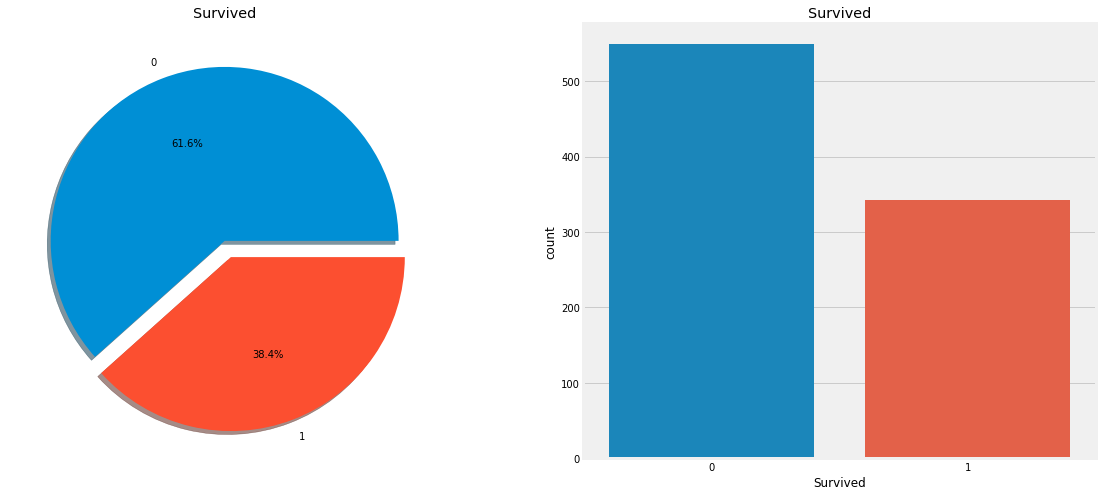

In [22]:
# How many Survived??

f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [23]:
# 성별과 생존여부를 기준으로 그룹핑
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

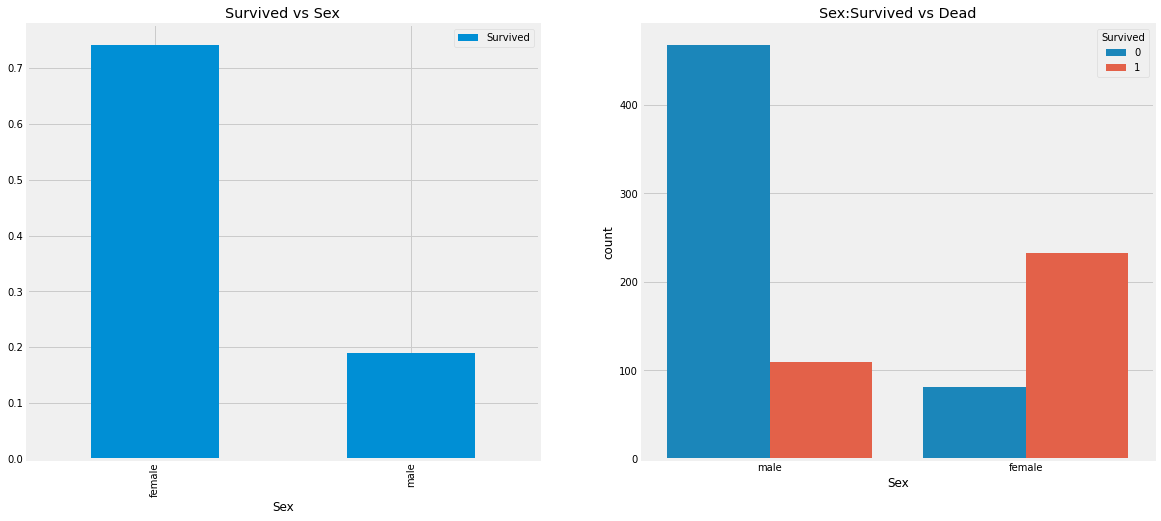

In [24]:
# 그룹핑한 결과를 토대로 그래프 작성

f,ax=plt.subplots(1,2,figsize=(18,8))
# 여성과 남성의 생존률 그래프
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 여성과 남성의 사망자와 생존자(파란색=사망자, 빨간색=생존자)
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [25]:
#좌석의 클래스에 따른 생존여부의 교차표

pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


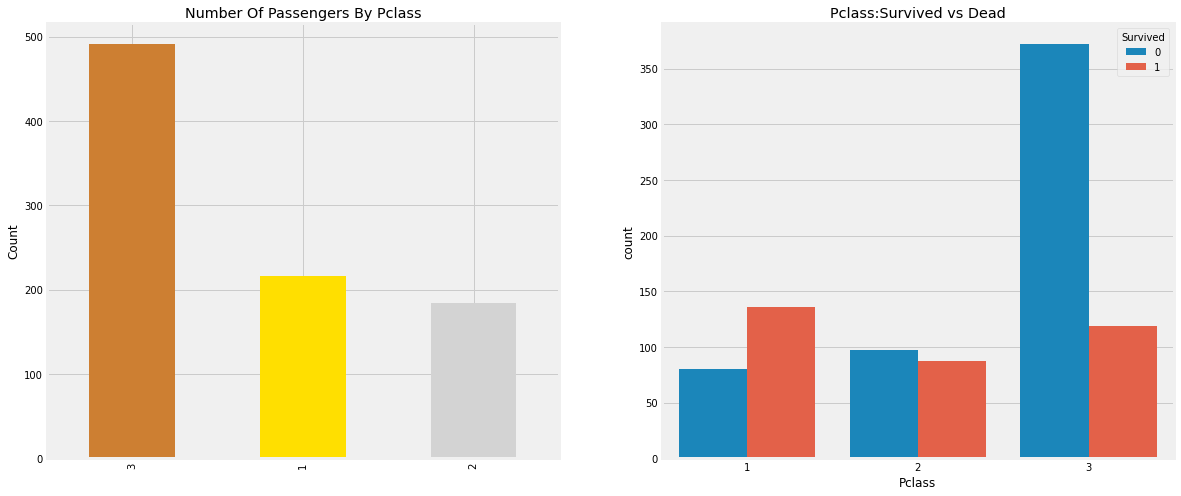

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
# Pclass에 따른 생존자 수
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
# Pclass에 따른 사망자와 생존자의 그래프
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()
# 3클래스가 비싼 좌석임에도 가장 높은 사망률을 보였다.

In [27]:
# Pclass와 성별에 따른 생존자 수의 교차표
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

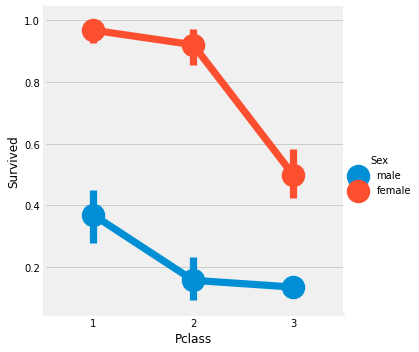

In [28]:
#위의 교차표를 그래프로 나타냄
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

In [29]:
# 나이 --> 연속형 특성
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


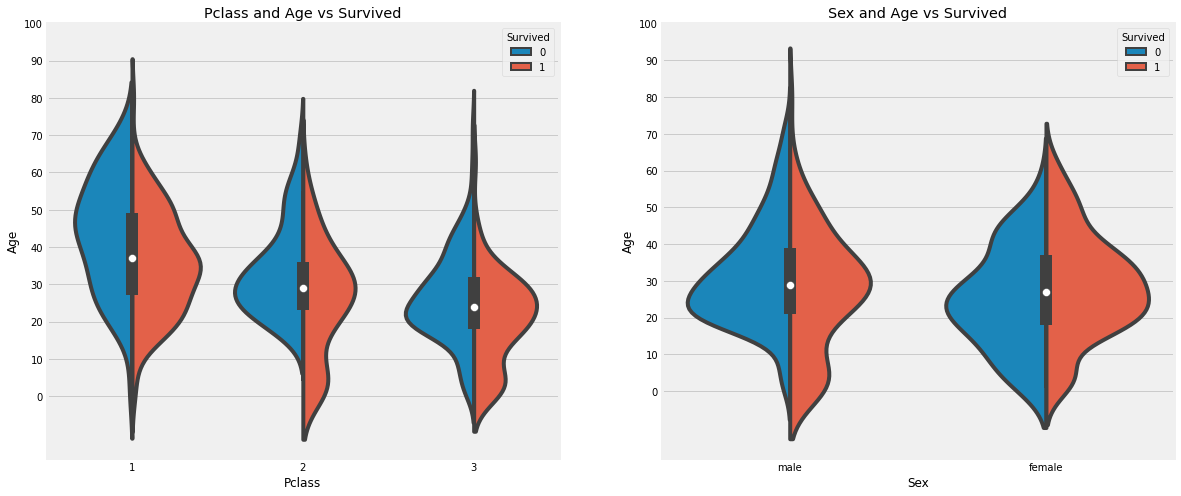

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))
# Pclass와 나이를 기준으로 생존여부 그래프 작성
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

# 성별과 나이를 기준으로 생존여부 그래프 작성
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [31]:
# Pclass가 높을수록 어린이의 수가 증가하며, Pclass와 관계없이 10세 미만의 승객(즉, 어린이)의 생존율은 좋아보입니다.
# 20-50세의 Pclass1 승객들의 생존 가능성이 높으며, 여성들에게 더욱 더 높아보입니다.
# 남성들의 경우 나이가 증가함에 따라 생존 가능성이 감소합니다.

In [32]:
# 이름에 따른 생존여부---> Feature

# 성씨를 data에 저장
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [34]:
#성씨와 성별을 기준으로 생존여부를 교차표로 나타냄

pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [35]:
# 성씨 입력 과정에서 오타가 있었고, 이를 정정
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [36]:
# 성씨별로 평균 나이 확인
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [37]:
# Age의 결측치 값 채우기(위의 평균 나이를 기반으로 채움)
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [38]:
# 결측지 확인
data.Age.isnull().any()

False

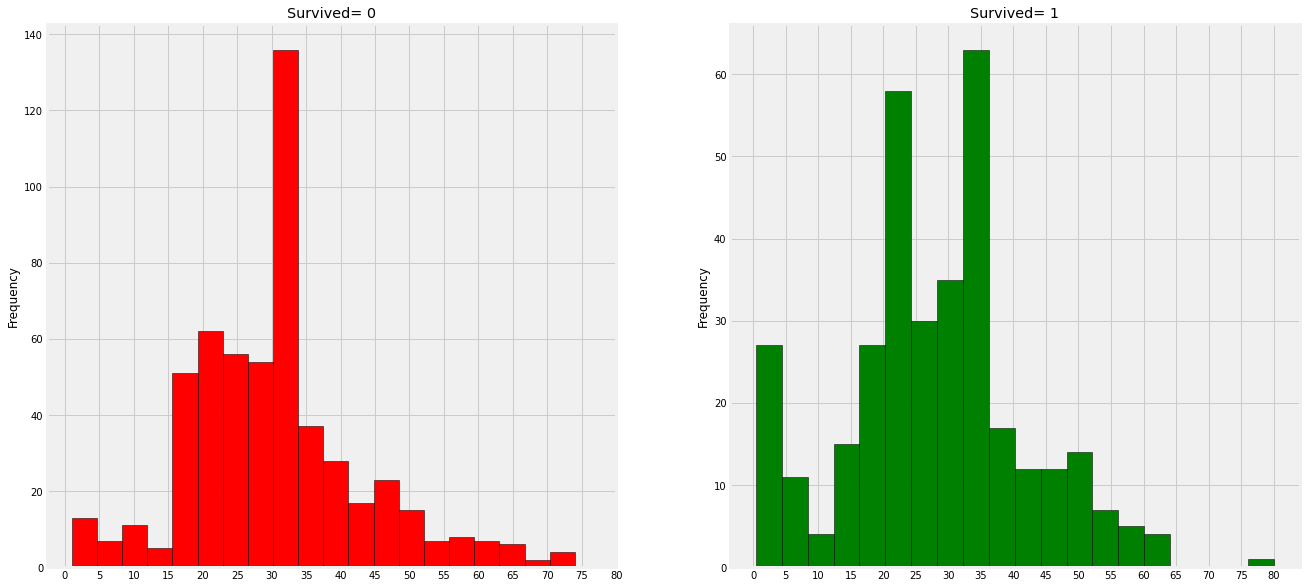

In [39]:
# 사망자와 생존자별 연령대 조사
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [40]:
# 1. 유아(나이 < 5)들이 큰 수로 구조되었습니다(여성과 아동 우선 정책).
# 2. 가장 나이 많은 승객(80세)이 구조되었습니다.
# 3. 가장 많은 사망자들은 30-40세 연령 그룹에서 발생했습니다.

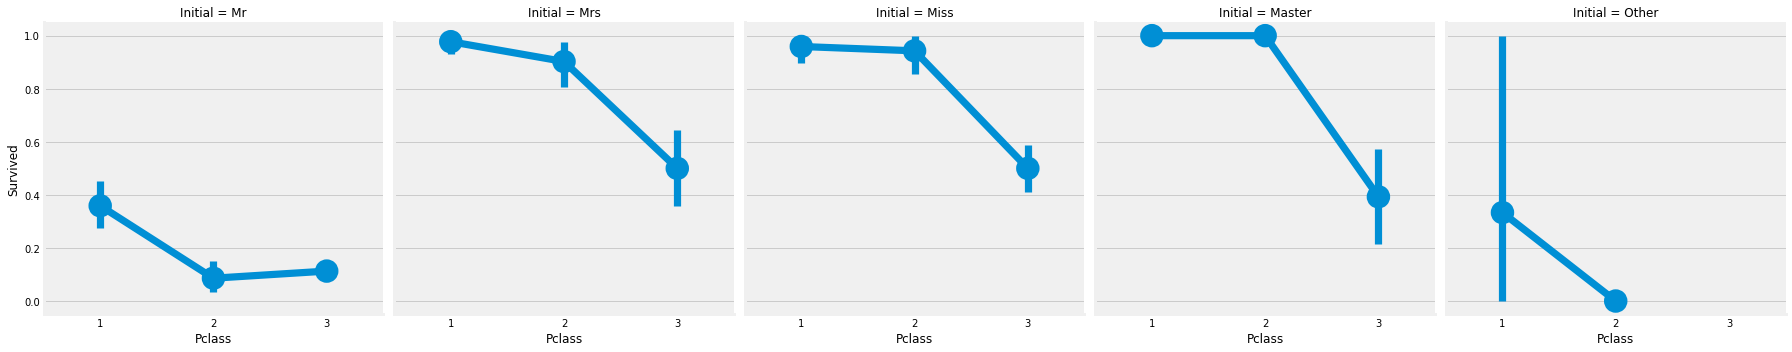

In [41]:
# 성씨에 따른 생존률
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

In [42]:
# 항구에 따른 생존자 교차표에 추가
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

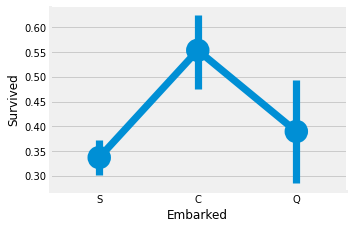

In [43]:
# 승선항에 따른 생존 가능성
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()
# 포트 C의 생존 가능성은 약 0.55로 가장 높고 포트 S는 가장 낮습니다.

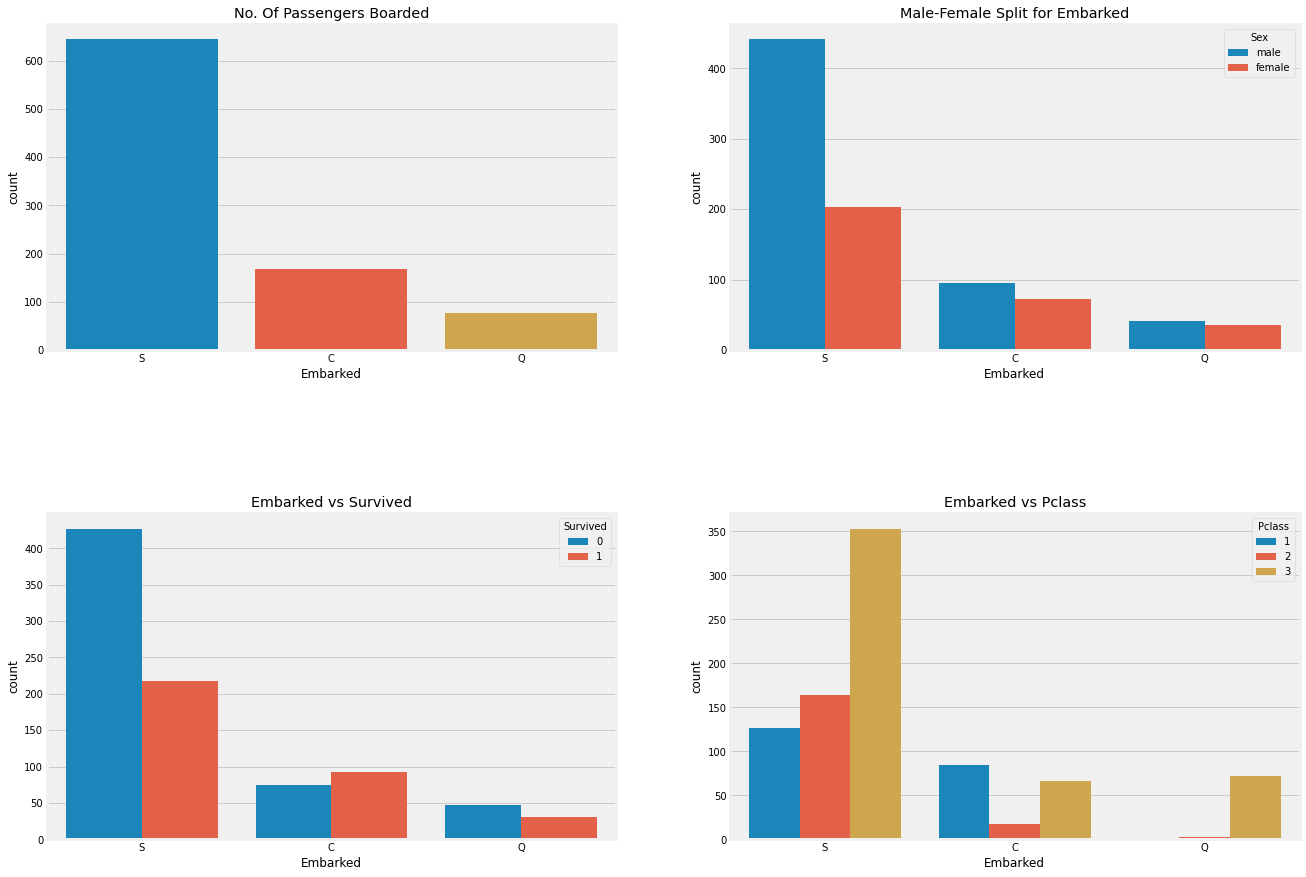

In [44]:
f,ax=plt.subplots(2,2,figsize=(20,15))
# 항구에 따른 탑승객의 수
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

#항구와 성별을 기준으로 탑승객의 사망자, 생존자 수
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

#항구별 생존자, 사망자 수
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

#항구별 탑승객의 Pclass 분포
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [45]:
# 가장 많은 승객들이 S 항구에서 탑승했습니다. 이들의 대부분은 Pclass3 승객들입니다.
# C 항구에서 탑승한 승객들은 생존율이 높아보입니다. 이는 Pclass1과 Pclass2 승객들이 모두 구조되었을 가능성 때문일 수 있습니다.
# S 항구는 부유한 사람들이 주로 탑승한 곳으로 보입니다. 그러나 생존 가능성은 낮아보입니다. 이는 Pclass3 승객들 중 약 81%가 생존하지 못했기 때문일 수 있습니다.
# Q 항구에서 탑승한 승객들의 거의 대부분은 Pclass3에서 왔습니다.

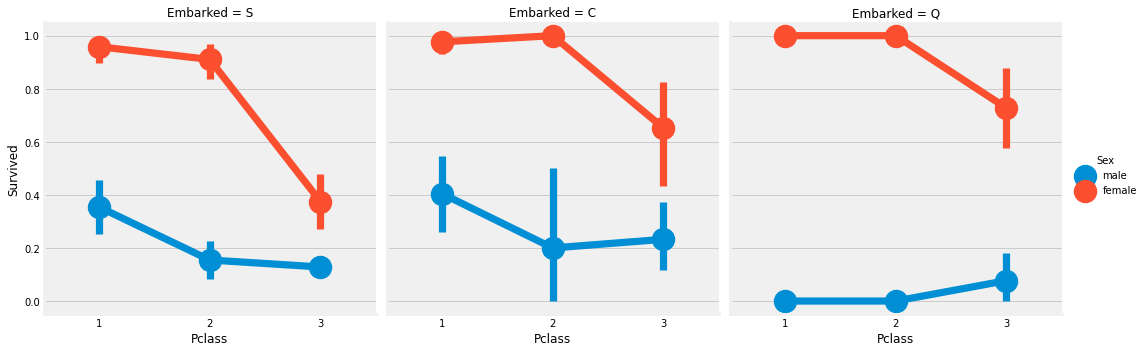

In [46]:
# 클래스와 항구를 기준으로 남성과 여성의 생존율
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [47]:
# Pclass1과 Pclass2의 여성들은 어떤 Pclass에 속하든 생존 가능성이 거의 1에 가깝습니다.
# Pclass3 승객들에게는 S 항구가 매우 불운한 항구로 보입니다. 남성과 여성 모두 생존율이 매우 낮습니다. (돈이 중요한 역할을 하는 것으로 보입니다)
# Q 항구는 거의 모든 승객들이 Pclass3에서 온 것으로 보입니다. 특히 남성들에게는 매우 불운한 항구로 보입니다.

In [48]:
# 항구 feature의 결측치 채우기(모두 'S'로 채움)

data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()# Finally No NaN values

False

In [49]:
# 가족 동행여부-->이산형 feature
# 같이 간 가족 수에 따른 생존여부
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [52]:
# 같이 간 가족 수와 Pclass에 따른 생존 여부
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7
